# Some analysis for the final project of comp370

## Load packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from urllib.request import urlopen
import os
import json
from collections import Counter
import shutil
import seaborn as sns
import math


folder = './sample_data'
if os.path.exists(folder):
    shutil.rmtree(folder)
    print(f"The folder '{folder}' has been deleted.")
else:
    print(f"The folder '{folder}' does not exist.")

The folder './sample_data' has been deleted.


## Load data file (our later-coding file)

In [ ]:
# URL to the later-coding CSV file on GitHub
url = 'https://raw.githubusercontent.com/qsn72/comp370-final-project/main/coding_data.csv'

# Reading the CSV file from the URL into a DataFrame
data = pd.read_csv(url)

# Selecting only the first four columns
data = data.iloc[:, :4]

# Replacing the specified values in the 'later-coding' column
data['later-coding'] = data['later-coding'].replace({
    'Career Achievements, Challenges, and Reflections': 'Career',
    'Personal life excluding Love Life': 'Personal life',
    'Cultural, Social and Commercial Impact': 'Impact'
})

# If 'later-coding' is 'Irrelevant', clear the corresponding 'opinion' value
data.loc[data['later-coding'] == 'Irrelevant', 'opinion'] = 'Irrelevant'

# Create './data' directory if it does not exist
if not os.path.exists('./data'):
    os.makedirs('./data')

# Saving the modified DataFrame to a CSV file named 'later-coding.csv' in the './data' directory
data.to_csv('./data/later-coding.csv', index=False)

# Displaying the DataFrame
data

,title,description,later-coding,opinion
0,Taylor Swift's '1989 (Taylor's Version)' Vault...,The '1989 (Taylor's Version)' Vault section ha...,Career,Neutral
1,Taylor Swifta??s a??1989a?? (Taylora??s Versio...,Taylor Swifta??s reimagined a??1989a?? is here...,Career,Positive
2,Taylor Swift grabs dinner with HAIM in NYC bef...,Taylor Swift was spotted grabbing dinner with ...,Personal life,Neutral
3,Taylor Swift addresses bisexual rumour in leak...,Speculation about the pop stara??s sexual pref...,Controversy,Neutral
4,Taylor Swifta??s New Era: The Pop Star Becomes...,"With a record-breaking tour, a blockbuster mov...",Career,Positive
...,...,...,...,...
527,Taylor Swift's 'Eras' Film to Get Streaming Re...,Taylor Swift's 'Eras Tour' movie will be relea...,Career,Positive
528,Taylor Swift Poses With Family of Fan Who Died...,Taylor Swift posed for a picture backstage on ...,Controversy,Negative
529,Taylor Swift Celebrating Bday With Expanded Er...,Taylor Swift will celebrate her 34th birthday ...,Career,Positive
530,Soon You Can Watch Taylor Swift's Eras Tour Fi...,"Starting next month, you'll be able to see Swi...",Career,Positive


## Some visualization

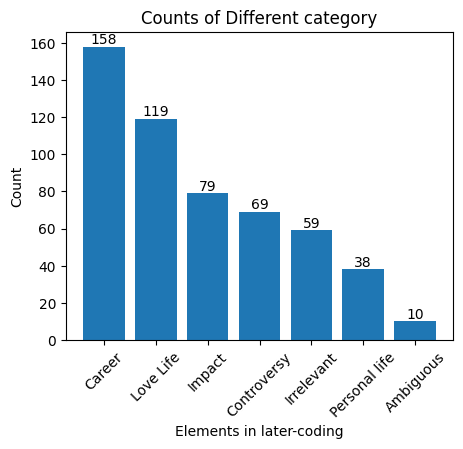

In [ ]:
# Counting the occurrences of each element in the 'later-coding' column
later_coding_counts = data['later-coding'].value_counts()

# Creating a bar plot
plt.figure(figsize=(5, 4))
bars = plt.bar(later_coding_counts.index, later_coding_counts.values)

# Adding the count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Counts of Different category')
plt.xlabel('Elements in later-coding')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

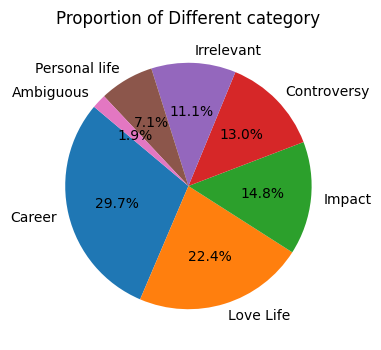

In [ ]:
# Creating a pie chart to show the proportion of each category in 'later-coding'

plt.figure(figsize=(5, 4))
plt.pie(later_coding_counts, labels=later_coding_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different category')
plt.show()

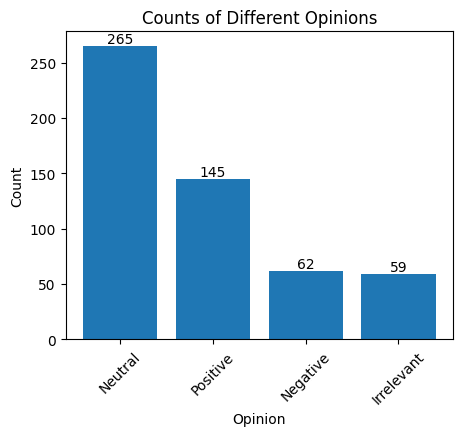

In [ ]:
# Counting the occurrences of each element in the 'opinion' column
opinion_counts = data['opinion'].value_counts()

# Creating a bar plot for the 'opinion' column
plt.figure(figsize=(5, 4))
opinion_bars = plt.bar(opinion_counts.index, opinion_counts.values)

# Adding the count above each bar
for bar in opinion_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Counts of Different Opinions')
plt.xlabel('Opinion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

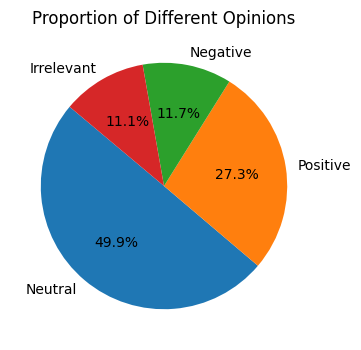

In [ ]:
# Creating a pie chart to show the proportion of each opinion category in 'opinion'

plt.figure(figsize=(5, 4))
plt.pie(opinion_counts, labels=opinion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Opinions')
plt.show()

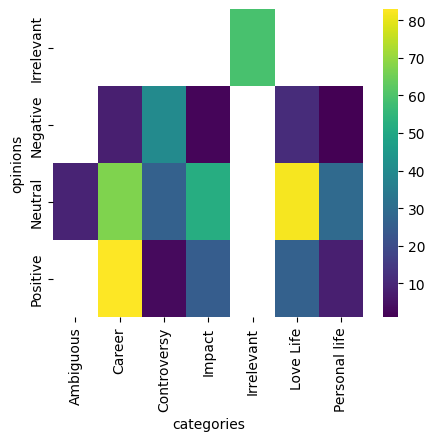

In [ ]:
plt.subplots(figsize=(5, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['opinion'].value_counts()
    for x_label, grp in data.groupby('later-coding')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('categories')
_ = plt.ylabel('opinions')

## Preprocessing for tf-idf analysis

### Remove all the punctuations and alphanumeric words in `title` and `description`

In [ ]:
data2 = data.copy()

# Function to replace all punctuation in a string with spaces
# and remove all alphanumeric words
def replace_punctuation_and_remove_alphanumeric(text):
    # Replace punctuation with spaces
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    # Remove alphanumeric words
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text

# Applying the function to the 'title' and 'description' columns of 'data2'
data2['title'] = data2['title'].apply(replace_punctuation_and_remove_alphanumeric)
data2['description'] = data2['description'].apply(replace_punctuation_and_remove_alphanumeric)

data2

,title,description,later-coding,opinion
0,Taylor Swift s Taylor s Version Vault Tra...,The Taylor s Version Vault section harks ...,Career,Neutral
1,Taylor Swifta s a Taylora s Version am...,Taylor Swifta s reimagined a is here the...,Career,Positive
2,Taylor Swift grabs dinner with HAIM in NYC bef...,Taylor Swift was spotted grabbing dinner with ...,Personal life,Neutral
3,Taylor Swift addresses bisexual rumour in leak...,Speculation about the pop stara s sexual pref...,Controversy,Neutral
4,Taylor Swifta s New Era The Pop Star Becomes...,With a record breaking tour a blockbuster mov...,Career,Positive
...,...,...,...,...
527,Taylor Swift s Eras Film to Get Streaming Re...,Taylor Swift s Eras Tour movie will be relea...,Career,Positive
528,Taylor Swift Poses With Family of Fan Who Died...,Taylor Swift posed for a picture backstage on ...,Controversy,Negative
529,Taylor Swift Celebrating Bday With Expanded Er...,Taylor Swift will celebrate her birthday next...,Career,Positive
530,Soon You Can Watch Taylor Swift s Eras Tour Fi...,Starting next month you ll be able to see Swi...,Career,Positive


### load stopwords file

In [ ]:
# URL to the text file
url = 'https://raw.githubusercontent.com/qsn72/comp370-final-project/main/stopwords.txt'

# Create './data' directory if it does not exist
if not os.path.exists('./data'):
    os.makedirs('./data')

# Reading the text file from the URL and saving it locally
with urlopen(url) as f:
    stopwords = [line.decode('utf-8').strip() for line in f.readlines()]

    # Saving the stopwords to a file in the './data' directory
    with open('./data/stopwords.txt', 'w', encoding='utf-8') as file:
        for word in stopwords:
            file.write(word + '\n')

# Now, 'stopwords' contains a list of stopwords from the file
print(stopwords)

['a', 'about', 'above', 'across', 'after', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'an', 'and', 'another', 'any', 'anybody', 'anyone', 'anything', 'anywhere', 'are', 'area', 'areas', 'around', 'as', 'ask', 'asked', 'asking', 'asks', 'at', 'away', 'b', 'back', 'backed', 'backing', 'backs', 'de', 'be', 'became', 'because', 'become', 'becomes', 'been', 'before', 'began', 'behind', 'being', 'beings', 'best', 'better', 'between', 'big', 'both', 'but', 'by', 'c', 'came', 'can', 'cannot', 'case', 'cases', 'certain', 'certainly', 'clear', 'clearly', 'come', 'could', 'd', 'did', 'differ', 'different', 'differently', 'do', 'does', 'done', 'down', 'down', 'downed', 'downing', 'downs', 'during', 'e', 'each', 'early', 'either', 'end', 'ended', 'ending', 'ends', 'enough', 'even', 'evenly', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'f', 'face', 'faces', 'fact', 'facts', 'far', 'felt', 'few', 'find', 'finds', 

### Remove all the stop words in `title` and `description`

In [ ]:
def remove_stopwords(text):
    # Splitting the text into words
    words = text.split()
    # Filtering out words that are in the stopwords list
    filtered_words = [word for word in words if word.lower() not in stopwords]
    # Joining the filtered words back into a string
    return ' '.join(filtered_words)

# Applying the function to the 'title' and 'description' columns of 'data2'
data2['title'] = data2['title'].apply(remove_stopwords)
data2['description'] = data2['description'].apply(remove_stopwords)

# Now, 'data2' has its 'title' and 'description' columns with stopwords removed
data2

,title,description,later-coding,opinion
0,Taylor Swift Taylor Version Vault Tracks Review,Taylor Version Vault section harks Swift lyric...,Career,Neutral
1,Taylor Swifta Taylora Version amid height pop ...,Taylor Swifta reimagined album ushered Peak Sw...,Career,Positive
2,Taylor Swift grabs dinner HAIM NYC release Tay...,Taylor Swift spotted grabbing dinner HAIM Holi...,Personal life,Neutral
3,Taylor Swift addresses bisexual rumour leaked ...,Speculation pop stara sexual preferences perco...,Controversy,Neutral
4,Taylor Swifta Era Pop Star Billionaire,record breaking tour blockbuster movie shrewd ...,Career,Positive
...,...,...,...,...
527,Taylor Swift Eras Film Streaming Release Extra...,Taylor Swift Eras Tour movie released home vie...,Career,Positive
528,Taylor Swift Poses Family Fan Died Rio Janeiro,Taylor Swift posed picture backstage Sunday No...,Controversy,Negative
529,Taylor Swift Celebrating Bday Expanded Eras To...,Taylor Swift celebrate birthday month offering...,Career,Positive
530,Soon Watch Taylor Swift Eras Tour Film Home,Starting month ll able Swift concert comfort c...,Career,Positive


### Remove all the Taylor Swift words in `title` and `description`

In [ ]:
def remove_taylor_swift_related_words(text):
    # Using a regular expression to remove words containing 'Taylor' or 'Swift', ignoring case
    text = re.sub(r'\b\S*Taylor\S*\b', '', text, flags=re.IGNORECASE)
    return re.sub(r'\b\S*Swift\S*\b', '', text, flags=re.IGNORECASE)

# Applying the function to the 'title' and 'description' columns of 'data2'
data2['title'] = data2['title'].apply(remove_taylor_swift_related_words)
data2['description'] = data2['description'].apply(remove_taylor_swift_related_words)


data2

,title,description,later-coding,opinion
0,Version Vault Tracks Review,Version Vault section harks lyrically musica...,Career,Neutral
1,Version amid height pop stara fame,reimagined album ushered Peak era revisited...,Career,Positive
2,grabs dinner HAIM NYC release Version,spotted grabbing dinner HAIM Holiday Bar Yor...,Personal life,Neutral
3,addresses bisexual rumour leaked letter,Speculation pop stara sexual preferences perco...,Controversy,Neutral
4,Era Pop Star Billionaire,record breaking tour blockbuster movie shrewd ...,Career,Positive
...,...,...,...,...
527,Eras Film Streaming Release Extra Songs,Eras Tour movie released home viewing month ...,Career,Positive
528,Poses Family Fan Died Rio Janeiro,posed picture backstage Sunday Nov family An...,Controversy,Negative
529,Celebrating Bday Expanded Eras Tour Movie De...,celebrate birthday month offering record bre...,Career,Positive
530,Soon Watch Eras Tour Film Home,Starting month ll able concert comfort couch,Career,Positive


### Count words for each type in title

json file is saved at `./data` directory

In [ ]:
# Getting unique types from the 'later-coding' column
types = data2['later-coding'].unique()

# Function to count words in titles for each type and sort them by count
def count_words(titles):
    word_count = Counter()
    for title in titles:
        word_count.update(word for word in title.lower().split())
    # Sorting the words by count in descending order
    return {word: count for word, count in sorted(word_count.items(), key=lambda item: item[1], reverse=True) if count >= 2}

# Counting words for each type
word_counts_by_type = {type_: count_words(data2[data2['later-coding'] == type_]['title']) for type_ in types}

# Creating the './data' directory if it doesn't exist
os.makedirs('./data', exist_ok=True)

# Writing the result to a JSON file
with open('./data/title_word-count.json', 'w') as file:
    json.dump(word_counts_by_type, file, indent=4)

# Printing the path of the saved file
print("Word counts saved to './data/title_word-count.json'")

Word counts saved to './data/title_word-count.json'


### Count words for each type in descriptions

json file is saved at `./data` directory

In [ ]:
# Getting unique types from the 'later-coding' column
types = data2['later-coding'].unique()

# Function to count words in descriptions for each type and sort them by count
def count_words(descriptions):
    word_count = Counter()
    for description in descriptions:
        word_count.update(word for word in description.lower().split())
    # Sorting the words by count in descending order
    return {word: count for word, count in sorted(word_count.items(), key=lambda item: item[1], reverse=True) if count >= 3}

# Counting words for each type in descriptions
description_word_counts_by_type = {type_: count_words(data2[data2['later-coding'] == type_]['description']) for type_ in types}

# Creating the './data' directory if it doesn't exist
os.makedirs('./data', exist_ok=True)

# Writing the result to a JSON file
with open('./data/description_word-count.json', 'w') as file:
    json.dump(description_word_counts_by_type, file, indent=4)

# Printing the path of the saved file
print("Word counts saved to './data/description_word-count.json'")

Word counts saved to './data/description_word-count.json'


### Count words for each type in title and descriptions

json file is saved at `./data` directory

In [ ]:
# Getting unique types from the 'later-coding' column
types = data2['later-coding'].unique()

# Function to count words in both titles and descriptions for each type and sort them by count
def count_words(titles_descriptions):
    word_count = Counter()
    for text in titles_descriptions:
        word_count.update(word for word in text.lower().split())
    # Sorting the words by count in descending order
    return {word: count for word, count in sorted(word_count.items(), key=lambda item: item[1], reverse=True) if count >= 3}

# Counting words for each type in both titles and descriptions
description_title_word_counts_by_type = {
    type_: count_words(pd.concat([data2[data2['later-coding'] == type_]['title'],
                                  data2[data2['later-coding'] == type_]['description']]))
    for type_ in types
}

# Creating the './data' directory if it doesn't exist
os.makedirs('./data', exist_ok=True)

# Writing the result to a JSON file
with open('./data/description_title_word-count.json', 'w') as file:
    json.dump(description_title_word_counts_by_type, file, indent=4)

# Printing the path of the saved file
print("Word counts saved to './data/description_title_word-count.json'")

Word counts saved to './data/description_title_word-count.json'


## Compute tf-idf score

The TF-IDF formula is represented as:

$$
\text{tf-idf}(w, \text{category}, \text{doc}) = \text{tf}(w, \text{category}) \times \text{idf}(w, \text{doc})
$$

Where:

$$
\text{tf}(w, \text{category}) = \text{the number of times category uses the word}\ w
$$

And:

$$
\text{idf}(w, \text{doc}) = \log \left( \frac{\text{total number of categories}}{\text{number of categories that use the word}\ w} \right)
$$


### Find the top 5 tf-idf score words in title
json file is saved at `./data` directory

In [ ]:
# Load the word counts from the JSON file
with open('./data/title_word-count.json', 'r') as file:
    word_counts = json.load(file)

# Calculate IDF for each word
total_categories = len(word_counts)
word_category_count = Counter([word for category in word_counts.values() for word in category.keys()])
idf = {word: math.log(total_categories / count) for word, count in word_category_count.items()}

# Calculate TF-IDF for each word in each category
tf_idf_scores = {}
for category, words in word_counts.items():
    tf_idf = {word: count * idf[word] for word, count in words.items()}
    # Sort by TF-IDF score and keep top 10
    top_5_words = dict(sorted(tf_idf.items(), key=lambda item: item[1], reverse=True)[:10])
    tf_idf_scores[category] = top_5_words

# Saving the TF-IDF scores to a JSON file
os.makedirs('./data', exist_ok=True)
with open('./data/title_tfidf.json', 'w') as file:
    json.dump(tf_idf_scores, file, indent=4)

print("TF-IDF scores saved to './data/title_tfidf.json'")

TF-IDF scores saved to './data/title_tfidf.json'


Find the top 5 tf-idf score words in description

json file is saved at `./data` directory

In [ ]:
# Load the word counts from the JSON file
with open('./data/description_word-count.json', 'r') as file:
    word_counts = json.load(file)

# Calculate IDF for each word
total_categories = len(word_counts)
word_category_count = Counter([word for category in word_counts.values() for word in category.keys()])
idf = {word: math.log(total_categories / count) for word, count in word_category_count.items()}

# Calculate TF-IDF for each word in each category
tf_idf_scores = {}
for category, words in word_counts.items():
    tf_idf = {word: count * idf[word] for word, count in words.items()}
    # Sort by TF-IDF score and keep top 10
    top_5_words = dict(sorted(tf_idf.items(), key=lambda item: item[1], reverse=True)[:10])
    tf_idf_scores[category] = top_5_words

# Saving the TF-IDF scores to a JSON file
os.makedirs('./data', exist_ok=True)
with open('./data/description_tfidf.json', 'w') as file:
    json.dump(tf_idf_scores, file, indent=4)

print("TF-IDF scores saved to './data/description_tfidf.json'")

TF-IDF scores saved to './data/description_tfidf.json'


### Find the top 5 tf-idf score words in title and description
json file is saved at `./data` directory

In [ ]:
# Load the word counts from the JSON file
with open('./data/description_title_word-count.json', 'r') as file:
    word_counts = json.load(file)

# Calculate IDF for each word
total_categories = len(word_counts)
word_category_count = Counter([word for category in word_counts.values() for word in category.keys()])
idf = {word: math.log(total_categories / count) for word, count in word_category_count.items()}

# Calculate TF-IDF for each word in each category
tf_idf_scores = {}
for category, words in word_counts.items():
    tf_idf = {word: count * idf[word] for word, count in words.items()}
    # Sort by TF-IDF score and keep top 10
    top_5_words = dict(sorted(tf_idf.items(), key=lambda item: item[1], reverse=True)[:10])
    tf_idf_scores[category] = top_5_words

# Saving the TF-IDF scores to a JSON file
os.makedirs('./data', exist_ok=True)
with open('./data/description_title_tfidf.json', 'w') as file:
    json.dump(tf_idf_scores, file, indent=4)

print("TF-IDF scores saved to './data/description_title_tfidf.json'")

TF-IDF scores saved to './data/description_title_tfidf.json'


### Some visualization

In [ ]:
def create_bar_plot(file_path, title):
    # Load the TF-IDF scores from the JSON file
    with open(file_path, 'r') as file:
        tf_idf_scores = json.load(file)

    # Create a directory for images if it doesn't exist
    os.makedirs('./images', exist_ok=True)

    # Create a figure for each category
    for category, scores in tf_idf_scores.items():
        plt.figure(figsize=(5, 4))  # Set the figure size to 5x4 inches
        words = list(scores.keys())
        values = list(scores.values())
        bars = plt.bar(words, values)
        plt.title(f'{title} - {category}')
        plt.xlabel('Words')
        plt.ylabel('TF-IDF Score')

        # Add the text with the score on top of each bar
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center')

        # Rotate x-axis labels
        plt.xticks(rotation=45)

        # Save the plot to the images directory
        plt.savefig(f'./images/{title}_{category}.png')

        plt.show()

#### top 10 tf-idf score words in title

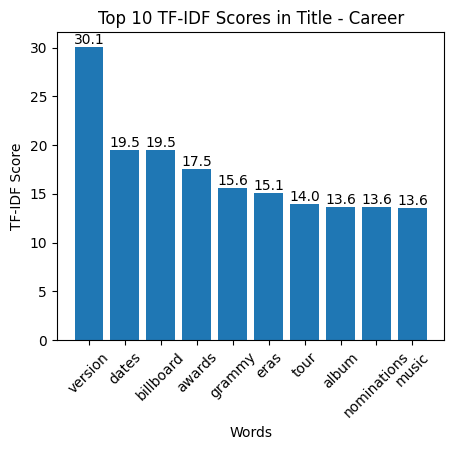

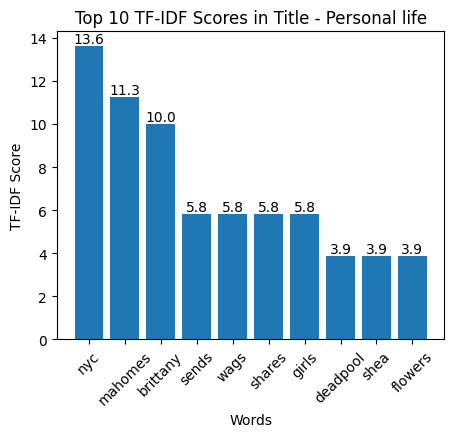

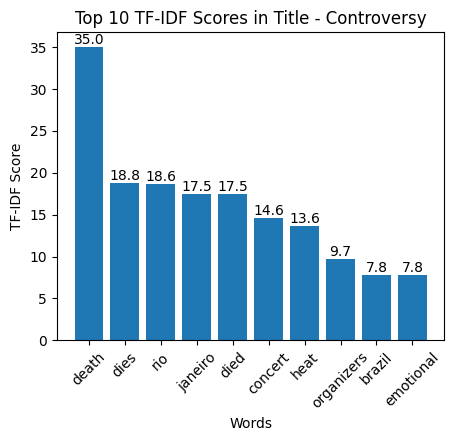

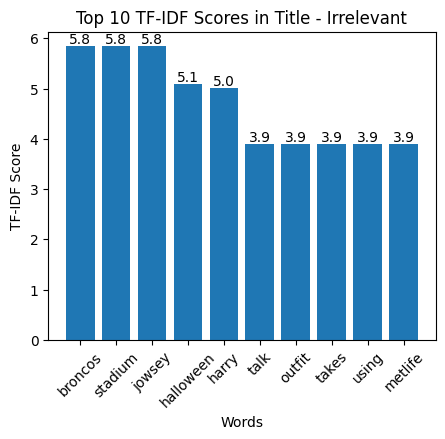

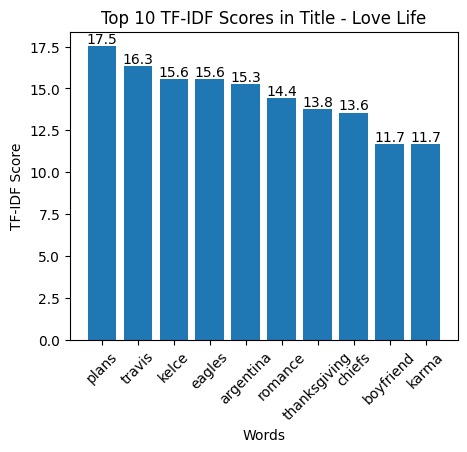

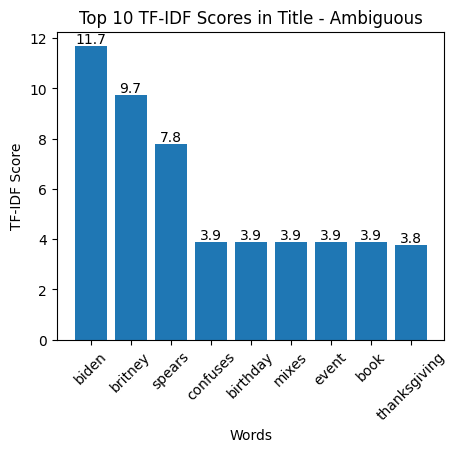

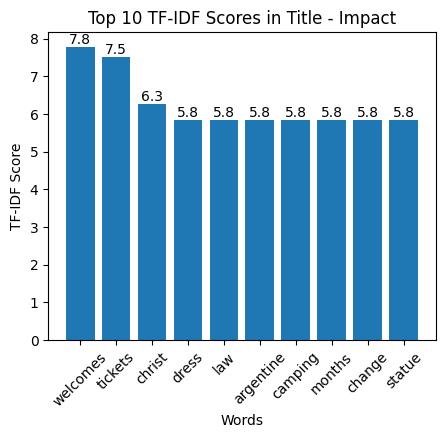

In [ ]:
# File paths
title_tfidf_file = './data/title_tfidf.json'
# Create bar plots for each file
create_bar_plot(title_tfidf_file, 'Top 10 TF-IDF Scores in Title')

#### top 10 tf-idf score words in description

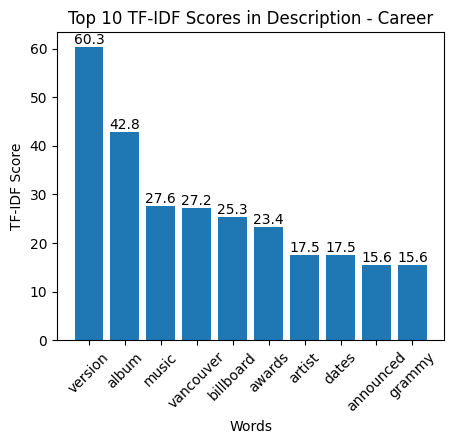

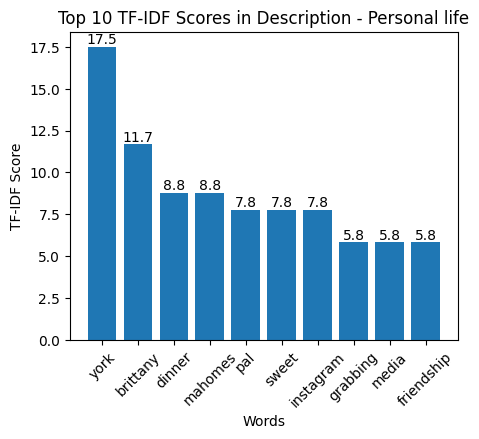

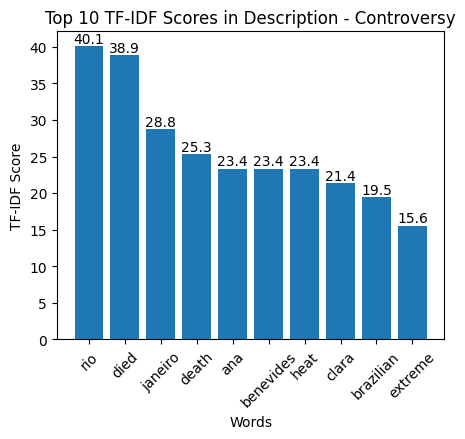

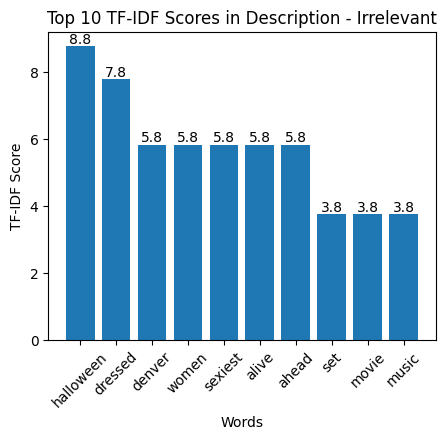

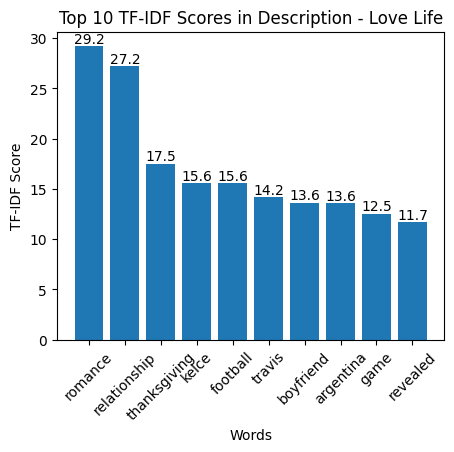

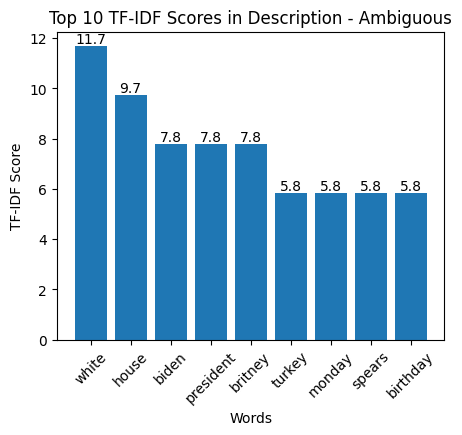

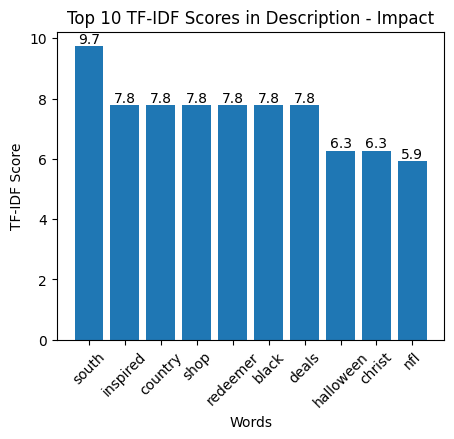

In [ ]:
# File paths
description_tfidf_file = './data/description_tfidf.json'
# Create bar plots for each file
create_bar_plot(description_tfidf_file, 'Top 10 TF-IDF Scores in Description')

#### top 10 tf-idf score words in title and description

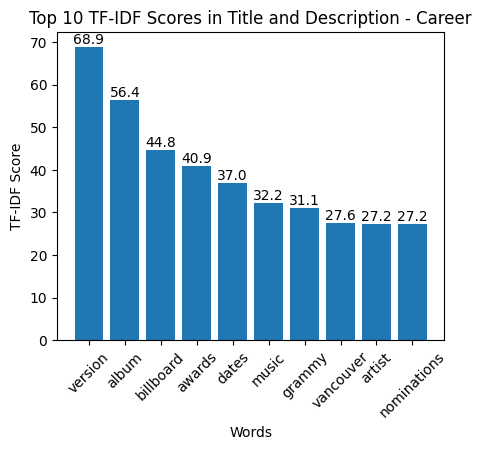

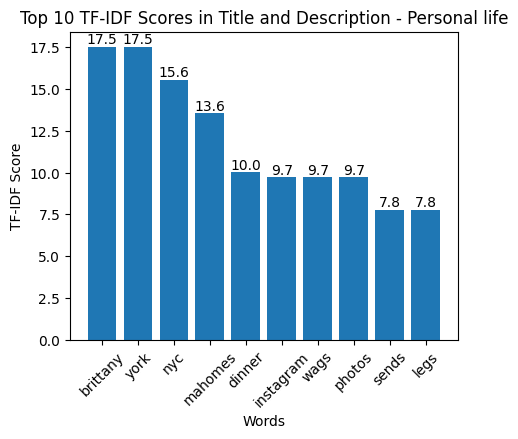

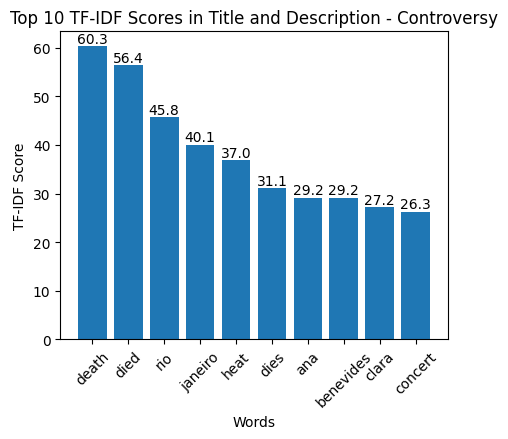

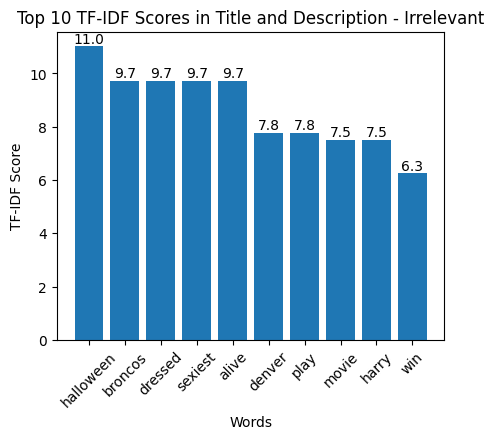

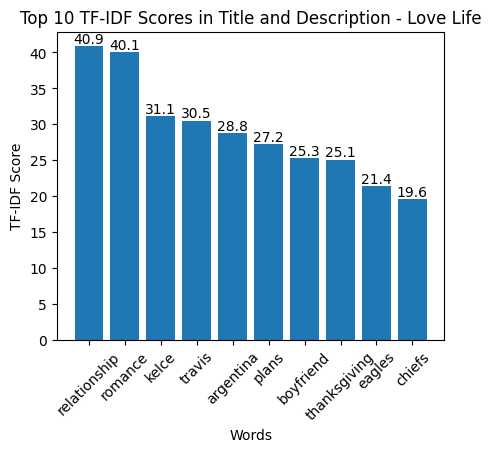

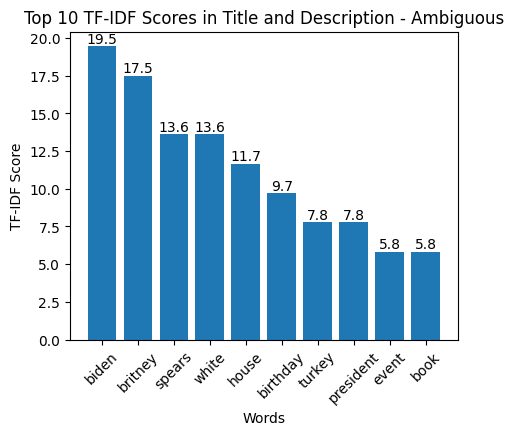

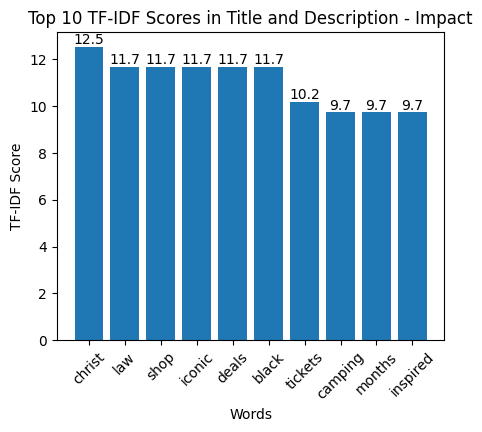

In [ ]:
# File paths
description_title_tfidf_file = './data/description_title_tfidf.json'
# Create bar plots for each file
create_bar_plot(description_title_tfidf_file, 'Top 10 TF-IDF Scores in Title and Description')